In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [2]:
#Testing for CVD, using max reduced csv file
heart_cvd = pd.read_csv('max_reduce.csv')
# Clean to columns needed
heart_cvd = heart_cvd[['SEX','AGE','SYSBP','CIGPDAY','BMI','TOTCHOL','DIABETES','BPMEDS','HEARTRTE','GLUCOSE','educ','CVD']]
heart_cvd.head()

,SEX,AGE,SYSBP,CIGPDAY,BMI,TOTCHOL,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,CVD
0,1,39,106.0,0.0,26.97,195.0,0,0.0,80.0,77.0,4.0,1
1,2,46,121.0,0.0,28.73,250.0,0,0.0,95.0,76.0,2.0,0
2,2,52,105.0,0.0,29.43,260.0,0,0.0,80.0,86.0,2.0,0
3,2,58,108.0,0.0,28.50,237.0,0,0.0,80.0,71.0,2.0,0
4,1,48,127.5,20.0,25.34,245.0,0,0.0,75.0,70.0,1.0,0


In [3]:
#Encode SEX column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
heart_cvd['SEX'] = label_encoder.fit_transform(heart_cvd['SEX'])

In [4]:
#Get dummies for educ col, drop first
heart_cvd = pd.get_dummies(heart_cvd,columns=['educ'],drop_first=True)
heart_cvd.head()

,SEX,AGE,SYSBP,CIGPDAY,BMI,TOTCHOL,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,CVD,educ_2.0,educ_3.0,educ_4.0
0,0,39,106.0,0.0,26.97,195.0,0,0.0,80.0,77.0,1,0,0,1
1,1,46,121.0,0.0,28.73,250.0,0,0.0,95.0,76.0,0,1,0,0
2,1,52,105.0,0.0,29.43,260.0,0,0.0,80.0,86.0,0,1,0,0
3,1,58,108.0,0.0,28.50,237.0,0,0.0,80.0,71.0,0,1,0,0
4,0,48,127.5,20.0,25.34,245.0,0,0.0,75.0,70.0,0,0,0,0


In [5]:
X = heart_cvd.drop("CVD", axis=1)
y = heart_cvd["CVD"]
print(X.shape, y.shape)

(9310, 13) (9310,)


In [6]:
X.head()

,SEX,AGE,SYSBP,CIGPDAY,BMI,TOTCHOL,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ_2.0,educ_3.0,educ_4.0
0,0,39,106.0,0.0,26.97,195.0,0,0.0,80.0,77.0,0,0,1
1,1,46,121.0,0.0,28.73,250.0,0,0.0,95.0,76.0,1,0,0
2,1,52,105.0,0.0,29.43,260.0,0,0.0,80.0,86.0,1,0,0
3,1,58,108.0,0.0,28.50,237.0,0,0.0,80.0,71.0,1,0,0
4,0,48,127.5,20.0,25.34,245.0,0,0.0,75.0,70.0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Deep Learning Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=11, activation='relu', input_dim=13))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Using TensorFlow backend.


In [9]:
#https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
from keras.metrics import categorical_accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.5984 - acc: 0.7370
Epoch 2/1000
 - 0s - loss: 0.5048 - acc: 0.7506
Epoch 3/1000
 - 0s - loss: 0.4975 - acc: 0.7524
Epoch 4/1000
 - 0s - loss: 0.4949 - acc: 0.7544
Epoch 5/1000
 - 0s - loss: 0.4933 - acc: 0.7585
Epoch 6/1000
 - 0s - loss: 0.4918 - acc: 0.7584
Epoch 7/1000
 - 0s - loss: 0.4909 - acc: 0.7592
Epoch 8/1000
 - 0s - loss: 0.4896 - acc: 0.7614
Epoch 9/1000
 - 0s - loss: 0.4889 - acc: 0.7598
Epoch 10/1000
 - 0s - loss: 0.4882 - acc: 0.7592
Epoch 11/1000
 - 0s - loss: 0.4877 - acc: 0.7598
Epoch 12/1000
 - 0s - loss: 0.4867 - acc: 0.7607
Epoch 13/1000
 - 0s - loss: 0.4865 - acc: 0.7607
Epoch 14/1000
 - 0s - loss: 0.4856 - acc: 0.7624
Epoch 15/1000
 - 0s - loss: 0.4853 - acc: 0.7601
Epoch 16/1000
 - 0s - loss: 0.4842 - acc: 0.7624
Epoch 17/1000
 - 0s - loss: 0.4837 - acc: 0.7622
Epoch 18/1000
 - 0s - loss: 0.4834 - acc: 0.7627
Epoch 19/1000
 - 0s - loss: 0.4826 - acc: 0.7595
Epoch 20/1000
 - 0s - loss: 0.4820 - acc: 0.7614
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.4544 - acc: 0.7872
Epoch 168/1000
 - 0s - loss: 0.4537 - acc: 0.7879
Epoch 169/1000
 - 0s - loss: 0.4531 - acc: 0.7877
Epoch 170/1000
 - 0s - loss: 0.4537 - acc: 0.7883
Epoch 171/1000
 - 0s - loss: 0.4520 - acc: 0.7916
Epoch 172/1000
 - 0s - loss: 0.4524 - acc: 0.7913
Epoch 173/1000
 - 0s - loss: 0.4532 - acc: 0.7889
Epoch 174/1000
 - 0s - loss: 0.4536 - acc: 0.7886
Epoch 175/1000
 - 0s - loss: 0.4528 - acc: 0.7886
Epoch 176/1000
 - 0s - loss: 0.4529 - acc: 0.7895
Epoch 177/1000
 - 0s - loss: 0.4520 - acc: 0.7890
Epoch 178/1000
 - 0s - loss: 0.4514 - acc: 0.7913
Epoch 179/1000
 - 0s - loss: 0.4512 - acc: 0.7919
Epoch 180/1000
 - 0s - loss: 0.4513 - acc: 0.7889
Epoch 181/1000
 - 0s - loss: 0.4520 - acc: 0.7880
Epoch 182/1000
 - 0s - loss: 0.4515 - acc: 0.7909
Epoch 183/1000
 - 0s - loss: 0.4510 - acc: 0.7919
Epoch 184/1000
 - 0s - loss: 0.4513 - acc: 0.7933
Epoch 185/1000
 - 0s - loss: 0.4508 - acc: 0.7946
Epoch 186/1000
 - 0s - loss: 0.4509 - acc: 0.7929
Epoch 187/1000


 - 0s - loss: 0.4384 - acc: 0.8055
Epoch 332/1000
 - 0s - loss: 0.4395 - acc: 0.8048
Epoch 333/1000
 - 0s - loss: 0.4381 - acc: 0.8039
Epoch 334/1000
 - 0s - loss: 0.4399 - acc: 0.8046
Epoch 335/1000
 - 0s - loss: 0.4432 - acc: 0.8029
Epoch 336/1000
 - 0s - loss: 0.4376 - acc: 0.8062
Epoch 337/1000
 - 0s - loss: 0.4404 - acc: 0.8035
Epoch 338/1000
 - 0s - loss: 0.4424 - acc: 0.7998
Epoch 339/1000
 - 0s - loss: 0.4415 - acc: 0.8002
Epoch 340/1000
 - 0s - loss: 0.4381 - acc: 0.8048
Epoch 341/1000
 - 0s - loss: 0.4377 - acc: 0.8062
Epoch 342/1000
 - 0s - loss: 0.4379 - acc: 0.8062
Epoch 343/1000
 - 0s - loss: 0.4387 - acc: 0.8061
Epoch 344/1000
 - 0s - loss: 0.4400 - acc: 0.8048
Epoch 345/1000
 - 0s - loss: 0.4378 - acc: 0.8048
Epoch 346/1000
 - 0s - loss: 0.4378 - acc: 0.8044
Epoch 347/1000
 - 0s - loss: 0.4374 - acc: 0.8056
Epoch 348/1000
 - 0s - loss: 0.4375 - acc: 0.8064
Epoch 349/1000
 - 0s - loss: 0.4374 - acc: 0.8052
Epoch 350/1000
 - 0s - loss: 0.4398 - acc: 0.8035
Epoch 351/1000


 - 0s - loss: 0.4327 - acc: 0.8101
Epoch 496/1000
 - 0s - loss: 0.4321 - acc: 0.8084
Epoch 497/1000
 - 0s - loss: 0.4327 - acc: 0.8105
Epoch 498/1000
 - 0s - loss: 0.4331 - acc: 0.8095
Epoch 499/1000
 - 0s - loss: 0.4347 - acc: 0.8084
Epoch 500/1000
 - 0s - loss: 0.4345 - acc: 0.8088
Epoch 501/1000
 - 0s - loss: 0.4327 - acc: 0.8112
Epoch 502/1000
 - 0s - loss: 0.4315 - acc: 0.8121
Epoch 503/1000
 - 0s - loss: 0.4356 - acc: 0.8074
Epoch 504/1000
 - 0s - loss: 0.4348 - acc: 0.8074
Epoch 505/1000
 - 0s - loss: 0.4341 - acc: 0.8107
Epoch 506/1000
 - 0s - loss: 0.4337 - acc: 0.8084
Epoch 507/1000
 - 0s - loss: 0.4337 - acc: 0.8094
Epoch 508/1000
 - 0s - loss: 0.4343 - acc: 0.8081
Epoch 509/1000
 - 0s - loss: 0.4359 - acc: 0.8064
Epoch 510/1000
 - 0s - loss: 0.4374 - acc: 0.8061
Epoch 511/1000
 - 0s - loss: 0.4328 - acc: 0.8109
Epoch 512/1000
 - 0s - loss: 0.4360 - acc: 0.8062
Epoch 513/1000
 - 0s - loss: 0.4313 - acc: 0.8108
Epoch 514/1000
 - 0s - loss: 0.4304 - acc: 0.8121
Epoch 515/1000


 - 0s - loss: 0.4276 - acc: 0.8128
Epoch 660/1000
 - 0s - loss: 0.4311 - acc: 0.8102
Epoch 661/1000
 - 0s - loss: 0.4300 - acc: 0.8097
Epoch 662/1000
 - 0s - loss: 0.4285 - acc: 0.8112
Epoch 663/1000
 - 0s - loss: 0.4289 - acc: 0.8114
Epoch 664/1000
 - 0s - loss: 0.4343 - acc: 0.8069
Epoch 665/1000
 - 0s - loss: 0.4297 - acc: 0.8118
Epoch 666/1000
 - 0s - loss: 0.4279 - acc: 0.8122
Epoch 667/1000
 - 0s - loss: 0.4308 - acc: 0.8095
Epoch 668/1000
 - 0s - loss: 0.4306 - acc: 0.8089
Epoch 669/1000
 - 0s - loss: 0.4300 - acc: 0.8107
Epoch 670/1000
 - 0s - loss: 0.4284 - acc: 0.8118
Epoch 671/1000
 - 0s - loss: 0.4292 - acc: 0.8107
Epoch 672/1000
 - 0s - loss: 0.4280 - acc: 0.8137
Epoch 673/1000
 - 0s - loss: 0.4312 - acc: 0.8117
Epoch 674/1000
 - 0s - loss: 0.4296 - acc: 0.8122
Epoch 675/1000
 - 0s - loss: 0.4280 - acc: 0.8118
Epoch 676/1000
 - 0s - loss: 0.4279 - acc: 0.8129
Epoch 677/1000
 - 0s - loss: 0.4299 - acc: 0.8102
Epoch 678/1000
 - 0s - loss: 0.4295 - acc: 0.8121
Epoch 679/1000


 - 0s - loss: 0.4270 - acc: 0.8137
Epoch 824/1000
 - 0s - loss: 0.4293 - acc: 0.8121
Epoch 825/1000
 - 0s - loss: 0.4280 - acc: 0.8140
Epoch 826/1000
 - 0s - loss: 0.4275 - acc: 0.8137
Epoch 827/1000
 - 0s - loss: 0.4296 - acc: 0.8118
Epoch 828/1000
 - 0s - loss: 0.4286 - acc: 0.8109
Epoch 829/1000
 - 0s - loss: 0.4285 - acc: 0.8119
Epoch 830/1000
 - 0s - loss: 0.4274 - acc: 0.8125
Epoch 831/1000
 - 0s - loss: 0.4264 - acc: 0.8137
Epoch 832/1000
 - 0s - loss: 0.4267 - acc: 0.8140
Epoch 833/1000
 - 0s - loss: 0.4253 - acc: 0.8154
Epoch 834/1000
 - 0s - loss: 0.4274 - acc: 0.8150
Epoch 835/1000
 - 0s - loss: 0.4282 - acc: 0.8118
Epoch 836/1000
 - 0s - loss: 0.4329 - acc: 0.8111
Epoch 837/1000
 - 0s - loss: 0.4281 - acc: 0.8118
Epoch 838/1000
 - 0s - loss: 0.4275 - acc: 0.8124
Epoch 839/1000
 - 0s - loss: 0.4283 - acc: 0.8128
Epoch 840/1000
 - 0s - loss: 0.4277 - acc: 0.8134
Epoch 841/1000
 - 0s - loss: 0.4273 - acc: 0.8124
Epoch 842/1000
 - 0s - loss: 0.4308 - acc: 0.8091
Epoch 843/1000


 - 0s - loss: 0.4298 - acc: 0.8109
Epoch 988/1000
 - 0s - loss: 0.4298 - acc: 0.8114
Epoch 989/1000
 - 0s - loss: 0.4256 - acc: 0.8154
Epoch 990/1000
 - 0s - loss: 0.4299 - acc: 0.8097
Epoch 991/1000
 - 0s - loss: 0.4264 - acc: 0.8140
Epoch 992/1000
 - 0s - loss: 0.4267 - acc: 0.8125
Epoch 993/1000
 - 0s - loss: 0.4266 - acc: 0.8142
Epoch 994/1000
 - 0s - loss: 0.4272 - acc: 0.8125
Epoch 995/1000
 - 0s - loss: 0.4268 - acc: 0.8119
Epoch 996/1000
 - 0s - loss: 0.4255 - acc: 0.8140
Epoch 997/1000
 - 0s - loss: 0.4244 - acc: 0.8160
Epoch 998/1000
 - 0s - loss: 0.4262 - acc: 0.8144
Epoch 999/1000
 - 0s - loss: 0.4280 - acc: 0.8109
Epoch 1000/1000
 - 0s - loss: 0.4276 - acc: 0.8124


## Quantify our Trained Model

In [10]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5796746525567832, Accuracy: 0.745704467149125


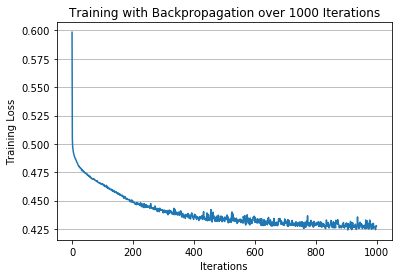

In [12]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

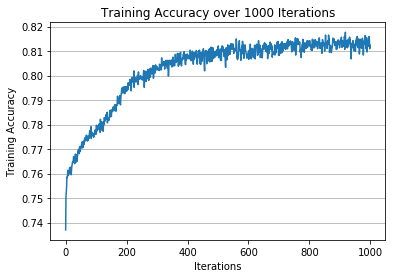

In [13]:
# accuracy should increase over epochs
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [14]:
def pred_count(heart_cvd):
    corr = 0
    wron = 0
    for index, row in heart_cvd.iterrows():
        if row['predicted'] == row['actual']:
            corr = corr + 1
        else:
            wron = wron + 1

    print(f'Correct predictions: {corr}')
    print(f'Incorrect predictions: {wron}')

predictions = model.predict_classes(X_test_scaled)
test_df = pd.DataFrame({'predicted':np.ravel(predictions),'actual':np.ravel(y_test)})
pred_count(test_df)


Correct predictions: 1736
Incorrect predictions: 592


# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [15]:
# Save the model
model.save("framingham_cvd.h5")

# Loading a Model

In [1]:
import pandas as pd
# Load the model
from keras.models import load_model
cvd_model = load_model("framingham_cvd.h5")

/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Evaluating the loaded model

In [17]:
model_loss, model_accuracy = cvd_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5796746525567832, Accuracy: 0.745704467149125


In [14]:
#%% create a sample "good" patient, not from data
pt = {'SEX':[0],'AGE':[20],'CIGPDAY':[0],'HEARTRTE':[65],'SYSBP':[120],
     'BPMEDS':[0],'TOTCHOL':[130],'BMI':[23],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[1]}
good_patient6 = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(good_patient6)

array([[1.]], dtype=float32)

In [15]:
print(f"Predicted class: {cvd_model.predict_classes(good_patient)}")

Predicted class: [[1]]


In [6]:
#%% create a sample "bad" patient, not from data
pt = {'SEX':[1],'AGE':[75],'CIGPDAY':[5],'HEARTRTE':[68],'SYSBP':[180],
     'BPMEDS':[0],'TOTCHOL':[210],'BMI':[25],'GLUCOSE':[70],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[0]}
bad_patient = pd.DataFrame(pt)

# return probability of response (cvd)
cvd_model.predict_proba(bad_patient)

array([[0.9329854]], dtype=float32)

In [7]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient)}")

Predicted class: [[1]]


In [8]:
#%% create a sample "bad" patient, not from data
pt2 = {'SEX':[1],'AGE':[75],'CIGPDAY':[55],'HEARTRTE':[90],'SYSBP':[180],
     'BPMEDS':[1],'TOTCHOL':[210],'BMI':[33],'GLUCOSE':[101],'DIABETES':[0],
     'educ_2.0':[0],'educ_3.0':[0],'educ_4.0':[0]}
bad_patient2 = pd.DataFrame(pt2)

# return probability of response (cvd)
cvd_model.predict_proba(bad_patient2)

array([[1.]], dtype=float32)

In [9]:
print(f"Predicted class: {cvd_model.predict_classes(bad_patient2)}")

Predicted class: [[1]]


In [ ]:
def pred_count(heart_cvd):
    corr = 0
    wron = 0
    for index, row in heart_cvd.iterrows():
        if row['predicted'] == row['actual']:
            corr = corr + 1
        else:
            wron = wron + 1

    print(f'Correct predictions: {corr}')
    print(f'Incorrect predictions: {wron}')

predictions = model.predict_classes(X_test_scaled)
test_df = pd.DataFrame({'predicted':np.ravel(predictions),'actual':np.ravel(y_test)})
pred_count(test_df)